## Analysis 01: Topic Modeling on Positive, Negative and Neutral Tweets

##### GETTING THE DATA

In [17]:
import pandas as pd 
import nltk

data1 = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\INFO 5731 Term Project\Sentimentalized Tweets.csv")
data1['Clean Tweet'] = data1['Clean Tweet'].apply(lambda x: nltk.word_tokenize(x))

# Separating positive, negative and neutral tweets and keeping them in dataframes

df_positive = data1[data1['Predicted Sentiment'] == 'Positive'] 
df_negative = data1[data1['Predicted Sentiment'] == 'Negative'] 
df_neutral = data1[data1['Predicted Sentiment'] == 'Neutral'] 

##### CONSTRUCTING DOCUMENT TERM MATRICES

In [18]:
from gensim import corpora, models

def doc_term_matrix(data):
    tweets = data['Clean Tweet'].to_list()
    id2word = corpora.Dictionary(tweets)
    corpus = [id2word.doc2bow(tweet) for tweet in tweets]
    return tweets, id2word, corpus

tweets_positive, id2word_positive, corpus_positive = doc_term_matrix(df_positive)
tweets_negative, id2word_negative, corpus_negative = doc_term_matrix(df_negative)
tweets_neutral, id2word_neutral, corpus_neutral = doc_term_matrix(df_neutral)

## LDA MODEL

##### FINDING OPTIMAL NUMBER OF TOPICS FOR LDA MODEL

Graph of Coherence Scores of Positive Tweets


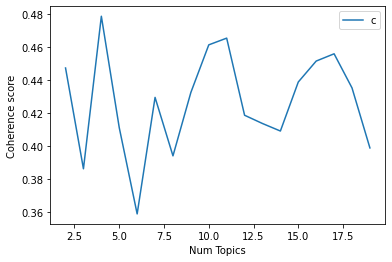

Graph of Coherence Scores of Negative Tweets


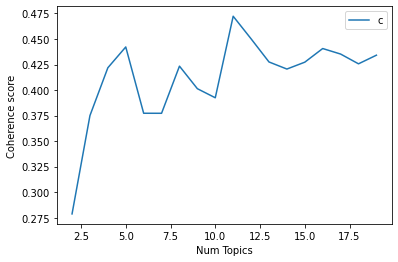

Graph of Coherence Scores of Neutral Tweets


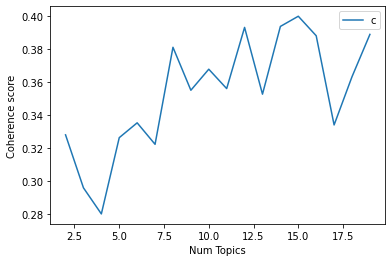

In [20]:
# Computing Coherence Scores
import gensim
from gensim.models import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

positive_model_list, positive_coherence_values = compute_coherence_values(dictionary=id2word_positive, corpus=corpus_positive, texts=tweets_positive, start=2, limit=20, step=1)
negative_model_list, negative_coherence_values = compute_coherence_values(dictionary=id2word_negative, corpus=corpus_negative, texts=tweets_negative, start=2, limit=20, step=1)
neutral_model_list, neutral_coherence_values = compute_coherence_values(dictionary=id2word_neutral, corpus=corpus_neutral, texts=tweets_neutral, start=2, limit=20, step=1)

# Graphs of Coherence Score against Number of Topics 

import matplotlib.pyplot as plt
%matplotlib inline

def plotting_lda_coherence(coherence_values):
    start = 2; limit = 20; step = 1
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

# Graph of Coherence Scores of Positive Tweets
print('Graph of Coherence Scores of Positive Tweets')
plotting_lda_coherence(positive_coherence_values)

# Graph of Coherence Scores of Negative Tweets
print('Graph of Coherence Scores of Negative Tweets')
plotting_lda_coherence(negative_coherence_values)

# Graph of Coherence Scores of Neutral Tweets
print('Graph of Coherence Scores of Neutral Tweets')
plotting_lda_coherence(neutral_coherence_values)

##### APPLYING LDA MODEL 

In [23]:
# Defining function to apply LDA model and print topics, perplexity and coherence
from pprint import pprint

def lda_model(corpus, id2word, texts, num_topics):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
    
    print('The topics using LDA Model are:')
    pprint(lda_model.print_topics())
    
    print('\nPerplexity:', lda_model.log_perplexity(corpus))
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('Coherence Score:', coherence_lda)

# Positive Tweets
# The optimal number of topics for positive tweets is 4
print('LDA MODEL FOR POSITIVE TWEETS\n')
lda_model(corpus = corpus_positive, id2word = id2word_positive, texts = tweets_positive, num_topics = 4)
print('\n')

# Negative Tweets
# The optimal number of topics for negative tweets is 11
print('LDA MODEL FOR NEGATIVE TWEETS\n')
lda_model(corpus = corpus_negative, id2word = id2word_negative, texts = tweets_negative, num_topics = 11)
print('\n')

# Neutral Tweets
# The optimal number of topics for positive tweets is 15
print('LDA MODEL FOR NEUTRAL TWEETS\n')
lda_model(corpus = corpus_neutral, id2word = id2word_neutral, texts = tweets_neutral, num_topics = 15)

LDA MODEL FOR POSITIVE TWEETS

The topics using LDA Model are:
[(0,
  '0.034*"coronavaccine" + 0.032*"covid19" + 0.031*"coronavirus" + '
  '0.020*"coronavirusvaccine" + 0.017*"vaccine" + 0.010*"covidvaccine" + '
  '0.008*"corona" + 0.008*"russia" + 0.007*"கரன" + 0.006*"india"'),
 (1,
  '0.025*"coronavaccine" + 0.020*"coronavirus" + 0.019*"coronavirusvaccine" + '
  '0.017*"covid19" + 0.007*"india" + 0.005*"vaccine" + 0.005*"covidvaccine" + '
  '0.005*"کی" + 0.004*"کے" + 0.004*"modi"'),
 (2,
  '0.032*"vaccine" + 0.030*"covid19" + 0.028*"coronavirusvaccine" + '
  '0.023*"coronavirus" + 0.015*"covid" + 0.014*"covidvaccine" + '
  '0.013*"coronavaccine" + 0.011*"corona" + 0.009*"amp" + 0.009*"great"'),
 (3,
  '0.073*"क" + 0.029*"coronavaccine" + 0.028*"करन" + 0.027*"म" + 0.023*"वकसन" '
  '+ 0.022*"coronavirus" + 0.020*"ह" + 0.018*"covid19" + '
  '0.015*"coronavirusvaccine" + 0.013*"स"')]

Perplexity: -7.904800635871482
Coherence Score: 0.3691140178589585


LDA MODEL FOR NEGATIVE TWEETS

The 

## LSA MODEL

##### FINDING OPTIMAL NUMBER OF TOPICS FOR LDA MODEL

Graph of Coherence Scores of Positive Tweets


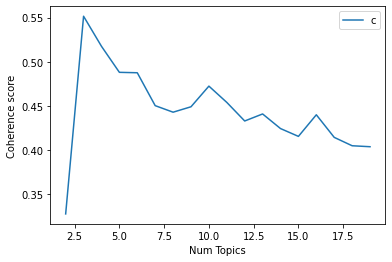

Graph of Coherence Scores of Negative Tweets


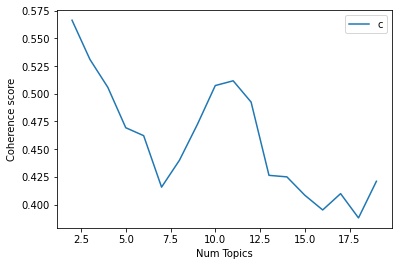

Graph of Coherence Scores of Neutral Tweets


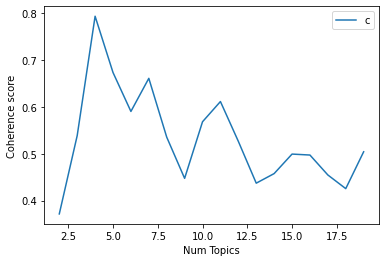

In [24]:
# Computing Coherence Scores
from gensim.models import LsiModel

def compute_lsa_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

lsa_positive_model_list, lsa_positive_coherence_values = compute_lsa_coherence_values(dictionary=id2word_positive, corpus=corpus_positive, texts=tweets_positive, start=2, limit=20, step=1)
lsa_negative_model_list, lsa_negative_coherence_values = compute_lsa_coherence_values(dictionary=id2word_negative, corpus=corpus_negative, texts=tweets_negative, start=2, limit=20, step=1)
lsa_neutral_model_list, lsa_neutral_coherence_values = compute_lsa_coherence_values(dictionary=id2word_neutral, corpus=corpus_neutral, texts=tweets_neutral, start=2, limit=20, step=1)

# Graphs of Coherence Score against Number of Topics 

def plotting_lsa_coherence(coherence_values):
    start = 2; limit = 20; step = 1
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

# Graph of Coherence Scores of Positive Tweets
print('Graph of Coherence Scores of Positive Tweets')
plotting_lda_coherence(lsa_positive_coherence_values)

# Graph of Coherence Scores of Negative Tweets
print('Graph of Coherence Scores of Negative Tweets')
plotting_lda_coherence(lsa_negative_coherence_values)

# Graph of Coherence Scores of Neutral Tweets
print('Graph of Coherence Scores of Neutral Tweets')
plotting_lda_coherence(lsa_neutral_coherence_values)

##### APPLYING THE LSA MODEL

In [25]:
# Defining function to apply LSA model and print topics, perplexity and coherence
from gensim.models import LsiModel

def lsa_model(corpus, id2word, texts, num_topics):
    lsa_model = LsiModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
    
    print('The topics using LSA Model are:')
    pprint(lsa_model.print_topics())
    
    coherence_model_lsa = CoherenceModel(model=lsa_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_lsa = coherence_model_lsa.get_coherence()
    print('Coherence Score:', coherence_lsa)

# Positive Tweets
# The optimal number of topics for positive tweets is 3
print('LSA MODEL FOR POSITIVE TWEETS\n')
lsa_model(corpus = corpus_positive, id2word = id2word_positive, texts = tweets_positive, num_topics = 3)
print('\n')

# Negative Tweets
# The optimal number of topics for negative tweets is 2
print('LSA MODEL FOR NEGATIVE TWEETS\n')
lsa_model(corpus = corpus_negative, id2word = id2word_negative, texts = tweets_negative, num_topics = 2)
print('\n')

# Neutral Tweets
# The optimal number of topics for neutral tweets is 4
print('LSA MODEL FOR NEUTRAL TWEETS\n')
lsa_model(corpus = corpus_neutral, id2word = id2word_neutral, texts = tweets_neutral, num_topics = 4)

LSA MODEL FOR POSITIVE TWEETS

The topics using LSA Model are:
[(0,
  '0.655*"क" + 0.292*"coronavirus" + 0.276*"covid19" + '
  '0.270*"coronavirusvaccine" + 0.214*"म" + 0.208*"करन" + '
  '0.201*"coronavaccine" + 0.191*"ह" + 0.184*"vaccine" + 0.171*"वकसन"'),
 (1,
  '-0.461*"क" + 0.455*"covid19" + 0.435*"vaccine" + 0.322*"coronavirus" + '
  '0.267*"coronavirusvaccine" + 0.219*"covidvaccine" + -0.136*"ह" + -0.135*"म" '
  '+ 0.126*"covid" + -0.119*"करन"'),
 (2,
  '0.371*"tinnitus" + 0.213*"amp" + 0.198*"great" + 0.195*"day" + '
  '0.195*"people" + 0.190*"result" + 0.189*"100" + 0.189*"back" + '
  '0.187*"others" + 0.187*"hear"')]
Coherence Score: 0.5514481792603446


LSA MODEL FOR NEGATIVE TWEETS

The topics using LSA Model are:
[(0,
  '0.612*"vaccine" + 0.392*"covid19" + 0.355*"coronavirusvaccine" + '
  '0.291*"covidvaccine" + 0.263*"coronavirus" + 0.238*"trial" + '
  '0.103*"coronavaccine" + 0.093*"astrazeneca" + 0.089*"india" + '
  '0.080*"covid"'),
 (1,
  '0.653*"क" + 0.351*"coronaviru